In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("traffic.csv", encoding="latin1")
df.head()



,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores MÃ¡s,No Llores MÃ¡s,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,MalÃ©,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [10]:

df.info()
df.isnull().sum()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [11]:

df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [12]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.isocalendar().week
df["month_name"] = df["date"].dt.strftime("%B")



In [13]:
total_events = len(df)
unique_artists = df["artist"].nunique()
unique_tracks = df["track"].nunique()

print("Total Events:", total_events)
print("Unique Artists:", unique_artists)
print("Unique Tracks:", unique_tracks)



Total Events: 226278
Unique Artists: 2419
Unique Tracks: 3562


In [14]:
events_country = df.groupby("country")["event"].count().sort_values(ascending=False)
print(events_country)



country
Saudi Arabia         47334
India                42992
United States        32558
France               15661
Iraq                  8260
                     ...  
Saint Martin             2
Wallis and Futuna        2
Solomon Islands          2
Lesotho                  1
Sint Maarten             1
Name: event, Length: 211, dtype: int64


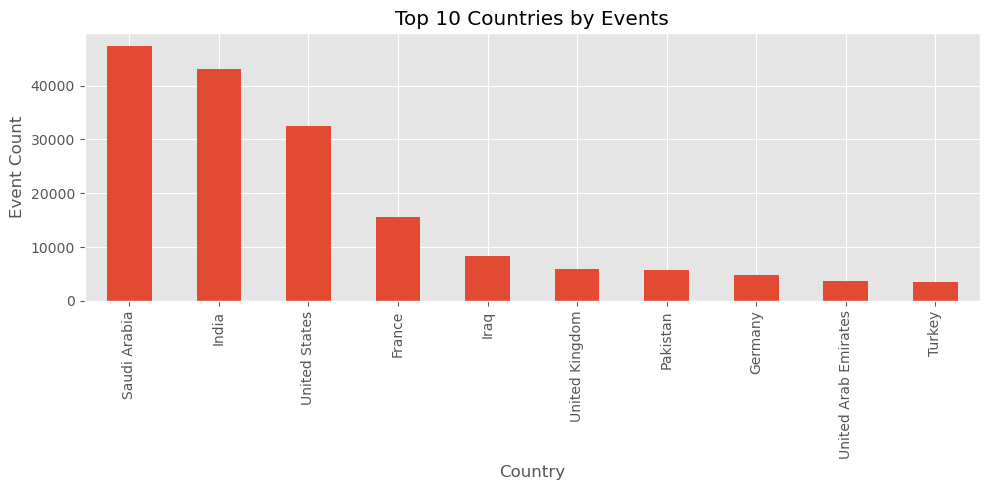

In [15]:
plt.figure(figsize=(10,5))
events_country.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Events")
plt.xlabel("Country")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()



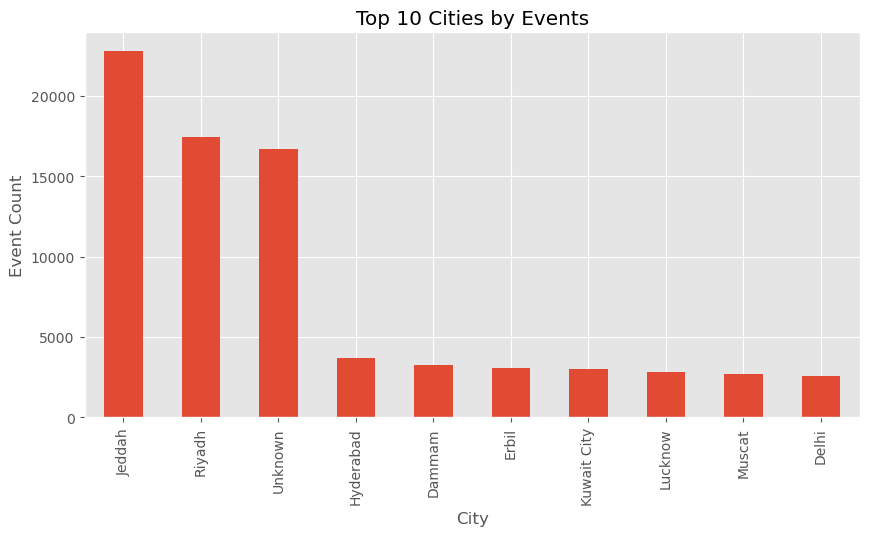

In [16]:
events_city = df.groupby("city")["event"].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
events_city.head(10).plot(kind="bar")
plt.title("Top 10 Cities by Events")
plt.xlabel("City")
plt.ylabel("Event Count")
plt.show()



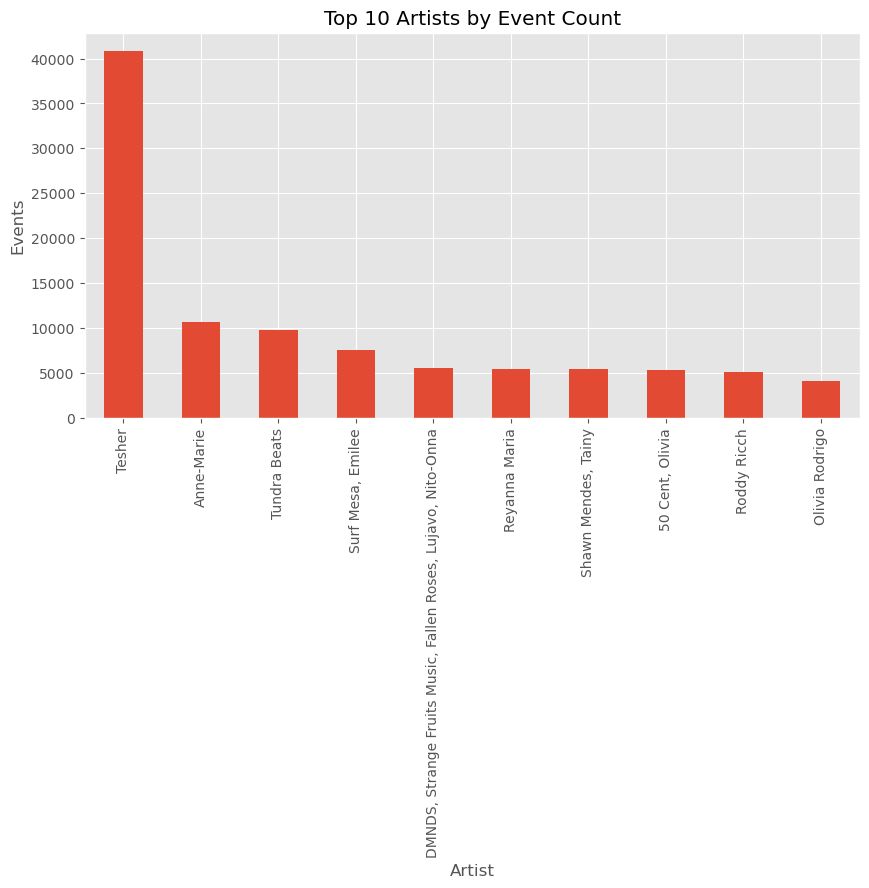

In [17]:
top_artists = df.groupby("artist")["event"].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
top_artists.head(10).plot(kind="bar")
plt.title("Top 10 Artists by Event Count")
plt.xlabel("Artist")
plt.ylabel("Events")
plt.show()


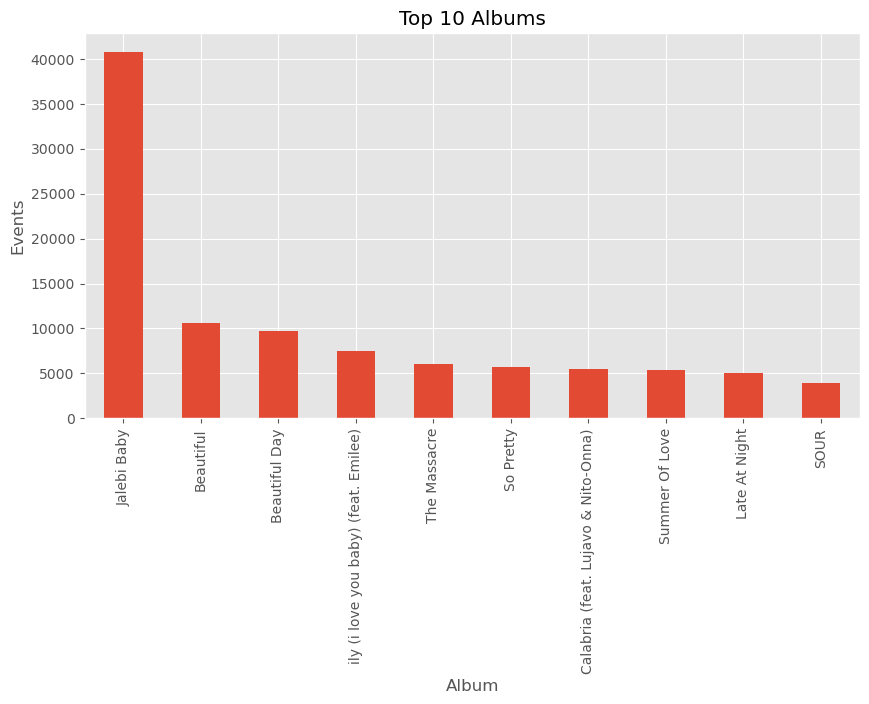

In [18]:
top_albums = df.groupby("album")["event"].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
top_albums.head(10).plot(kind="bar")
plt.title("Top 10 Albums")
plt.xlabel("Album")
plt.ylabel("Events")
plt.show()


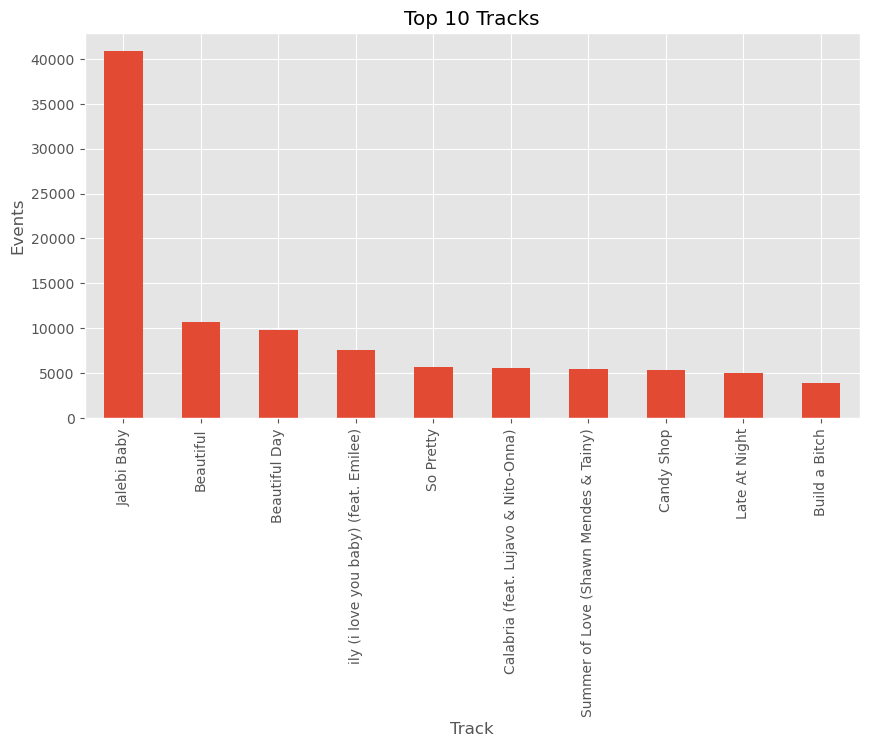

In [19]:
top_tracks = df.groupby("track")["event"].count().sort_values(ascending=False)

plt.figure(figsize=(10,5))
top_tracks.head(10).plot(kind="bar")
plt.title("Top 10 Tracks")
plt.xlabel("Track")
plt.ylabel("Events")
plt.show()


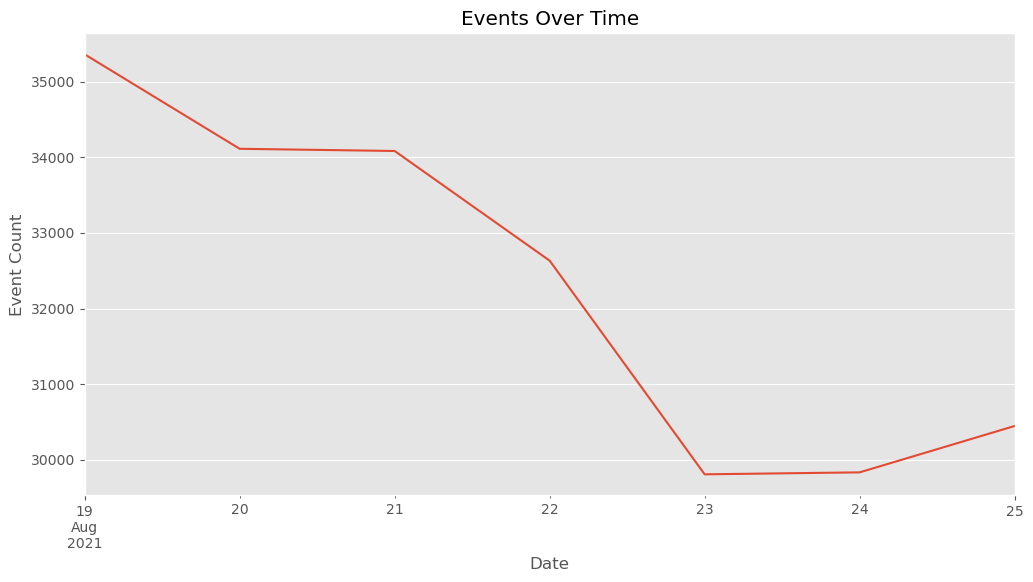

In [20]:
events_over_time = df.groupby("date")["event"].count()

plt.figure(figsize=(12,6))
events_over_time.plot()
plt.title("Events Over Time")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.show()


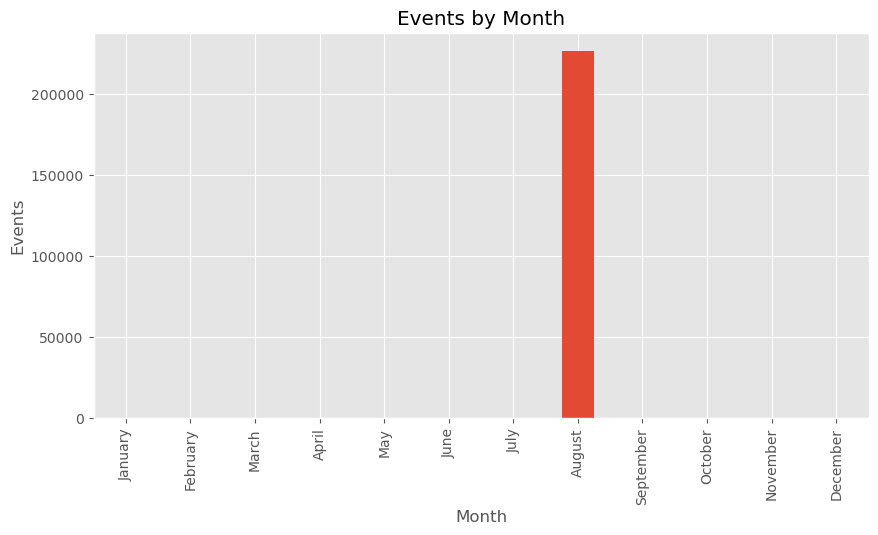

In [21]:
monthly_trend = df.groupby("month_name")["event"].count().reindex(
    ["January", "February", "March", "April", "May", "June",
     "July", "August", "September", "October", "November", "December"]
)

plt.figure(figsize=(10,5))
monthly_trend.plot(kind="bar")
plt.title("Events by Month")
plt.xlabel("Month")
plt.ylabel("Events")
plt.show()


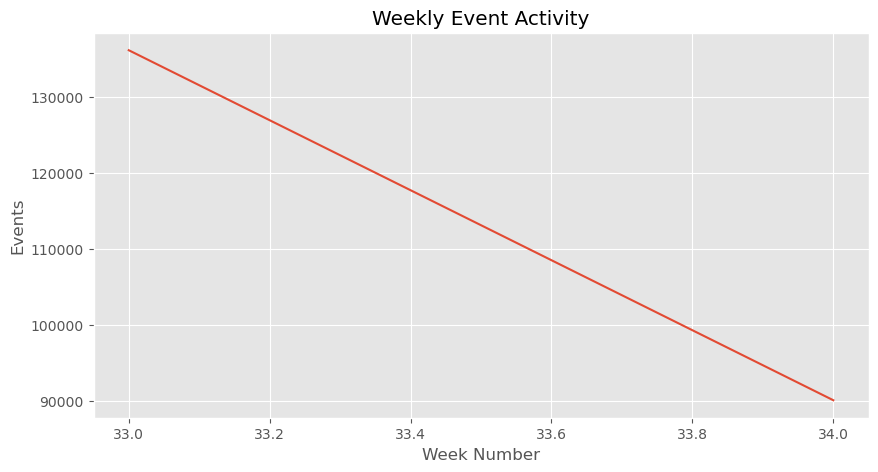

In [22]:
weekly_trend = df.groupby("week")["event"].count()

plt.figure(figsize=(10,5))
weekly_trend.plot()
plt.title("Weekly Event Activity")
plt.xlabel("Week Number")
plt.ylabel("Events")
plt.show()
